In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import os 

In [7]:
A = np.random.uniform(0,1,(3,4))
print(A)
np.fill_diagonal(A, A.diagonal() + 2)
print(A)

[[0.24917551 0.78754395 0.58087051 0.18406714]
 [0.54547085 0.43086094 0.73482933 0.17919471]
 [0.94810254 0.03669293 0.5499967  0.62831725]]
[[2.24917551 0.78754395 0.58087051 0.18406714]
 [0.54547085 2.43086094 0.73482933 0.17919471]
 [0.94810254 0.03669293 2.5499967  0.62831725]]


In [2]:
def get_ordered_subdirectories(directory):
    entries = os.listdir(directory)
    subdirs = [os.path.join(directory, entry) for entry in entries if os.path.isdir(os.path.join(directory, entry))]
    subdirs.sort()
    
    return subdirs

base = os.path.join(os.getcwd(),"ExperimentLogs")
ordered_subdirs = get_ordered_subdirectories(base)
last_exp = ordered_subdirs[-1]

In [3]:
last_exp

'C:\\Users\\zogaj\\PycharmProjects\\MA\\ExperimentLogs\\2024-07-12-13-10-51'

In [4]:
def load_all_pickles(directory:str, model: str, graphtype: str) -> list:
    """
    Iterates over all pickle files in the specified directory and loads them.
    
    :param directory: Path to the directory containing the pickle files
    :return: A list of loaded objects from the pickle files
    """
    loaded_objects = []
    final_path = os.path.join(directory, model, graphtype)
    
    # Iterate over all files in the directory
    for filename in os.listdir(final_path):
        if filename[0] == "o":
            file_path = os.path.join(final_path, filename)
            with open(file_path, 'rb') as file:
                loaded_objects.append(pickle.load(file))
    
    return loaded_objects
 

## Store the results of all Model/Scenario Combinations 

In [5]:
res_gcn_noise = load_all_pickles(last_exp, "GCN", "noise")
res_gat_noise = load_all_pickles(last_exp, "GAT", "noise")
res_sage_noise = load_all_pickles(last_exp, "SAGE", "noise")

res_gcn_perfect = load_all_pickles(last_exp, "GCN", "perfect")
res_gat_perfect = load_all_pickles(last_exp, "GAT", "perfect")
res_sage_perfect = load_all_pickles(last_exp, "SAGE", "perfect")

# GCN and Gat yield the same 

# Plot 

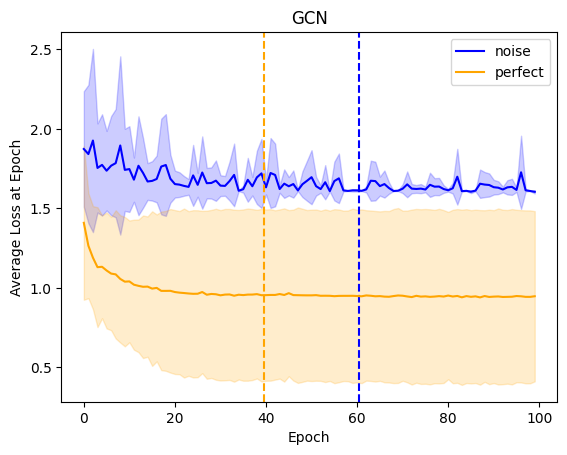

In [6]:
def plot_with_confidence_interval(target, color):
    """
    Plots figure for one Scenario. Used in a loop for final plot. 
    :param target: Results of the scenario.
    :param color: Color for scenario mapping. 
    :return: 
    """
 
    ys = np.array([lp["loss_track"] for lp in target])
    avg_final_epoch = np.mean([lp["final_epoch"] for lp in target])

    mean_ys = np.mean(ys, axis=0)
    std_ys = np.sqrt(np.var(ys, axis=0))

    ci_upper = mean_ys + 1.96 * std_ys
    ci_lower = mean_ys - 1.96 * std_ys
    x = np.arange(len(mean_ys))

    # Plot the mean
    plt.plot(x, mean_ys, color=color)
    plt.fill_between(x, ci_lower, ci_upper, color=color, alpha=0.2)
    plt.axvline(x=avg_final_epoch, color=color, linestyle='--')


targets = [res_gcn_noise, res_gcn_perfect] 
labels = ['noise', 'perfect']  
colors = ['b', 'orange', 'green'] 


plt.figure()
for target, label, color in zip(targets, labels, colors):
    plot_with_confidence_interval(target, color)
    plt.plot([], [], color=color, label=label)  


plt.xlabel('Epoch')
plt.ylabel('Average Loss at Epoch')
plt.title('GCN')
plt.legend(loc='upper right')
plt.show()


In [4]:
import warnings

def foo(x: int):
    if x > 0:
        print("x is positive")
    else:
        print("\033[91mWarning: x is not positive!\033[0m")
        #warnings.warn("\033[91m x is not positive!\033[0m")

# Example usage:
foo(-5)  # This will trigger the else statement and print the warning in red.
print("Hello")


Hello
